In [1]:
import sys
sys.path.append('src')

import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt

from src import SABR
from src.SABR_IV_approximators import AntonovApprox, Hagan
import helperfunctions as hf
from src.classes import MatlabMonteCarlo

In [3]:
MMC = MatlabMonteCarlo()

C:\Users\hugo\OneDrive\Documents\Quantitative Finance\Thesis\Code\matlab_code


In [4]:
strike_min = 0.4
strike_max = 1.6
strike_step = .01
strike_step_large = .1

### Generate smile via Monte Carlo
SABR parameters obtained via Hagan calibration on SPX options smile on 2020-09-03 with 15 days to expiry

C:\Users\hugo\OneDrive\Documents\Quantitative Finance\Thesis\Code\src\SABR_IV_approximators.py:32: RuntimeWarning: divide by zero encountered in arctanh
  output = 2 * np.arctanh(np.sqrt(num / denom))


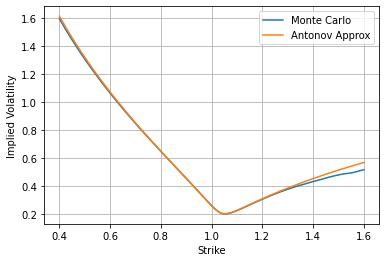

In [7]:
T = 15/365
alpha = .26
beta = .5
rho = -0.75
v = 5.4

# 0.25743722, -0.74265   ,  3.64955481

smile = MMC.simulateSABRSmile(1e6, 100, T, 0., 1., alpha, beta, rho, v, (strike_min,strike_max,strike_step), smoothing=False)
fit = SABR.plot_sim_fit([AntonovApprox()], alpha, beta, rho, v, T, smile)

In [5]:
antonov = AntonovApprox()

# large strike range, small steps of .01
strikes_all = np.arange(strike_min, strike_max + strike_step, strike_step)
strikes_all = np.round(strikes_all, 2)

# strike subset, only strikes with steps of 0.1
strikes_interp = np.arange(strike_min, strike_max + strike_step_large, strike_step_large)
strikes_interp = np.round(strikes_interp,2)

# Antonov IV for the subset of strikes
iv_interp = [antonov.calc_iv(alpha, beta, rho, v, (K, 1), T) for K in strikes_interp]

C:\Users\hugo\OneDrive\Documents\Quantitative Finance\Thesis\Code\src\SABR_IV_approximators.py:32: RuntimeWarning: divide by zero encountered in arctanh
  output = 2 * np.arctanh(np.sqrt(num / denom))


### Interpolate

In [8]:
f = interp1d(strikes_interp, iv_interp, kind='cubic')
interpolated = f(strikes_all)
smile['interpolated'] = interpolated

### Create plot

In [9]:
save_path = r"C:\Users\hugo\OneDrive\Documents\Quantitative Finance\Thesis\Plots"

In [10]:
colors = ['#d7191c','#fdae61','#abd9e9','#2c7bb6']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

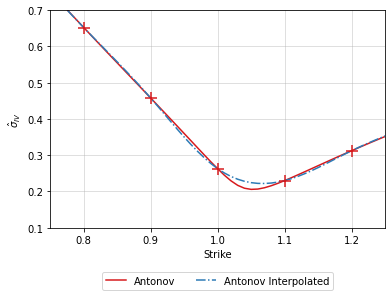

In [16]:
ax = plt.subplot()

plt.plot(smile['strike'], smile['Antonov Approx'], color=colors[0])
plt.plot(smile['strike'], smile['interpolated'], linestyle='-.', color=colors[3])
plt.scatter(strikes_interp, iv_interp, marker='+', s=150, zorder=10, color=colors[0])

plt.xlim(.75,1.25)
plt.ylim(0.1, 0.7)

plt.grid(alpha=.5)
plt.ylabel('$\hat{\sigma}_{IV}$')

plt.xlabel('Strike')
# plt.ylabel('Implied Volatility')

labels = ['Antonov', 'Antonov Interpolated']
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), labels=labels, ncol=2)

plt.savefig(save_path + '/interpolation.eps', bbox_inches='tight')
